# Gait Detection Notebook

user03-50Hz-normal-1.csv
(8097, 8)


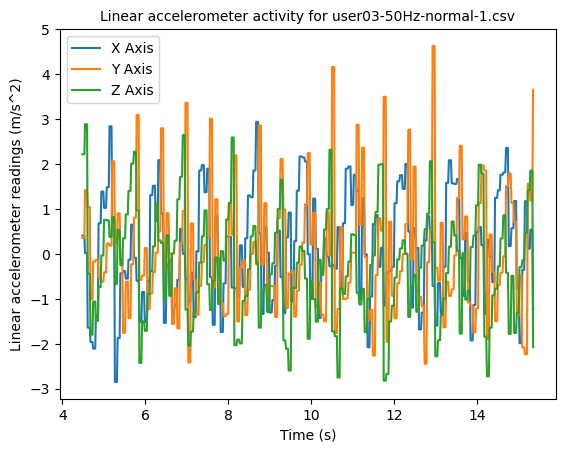

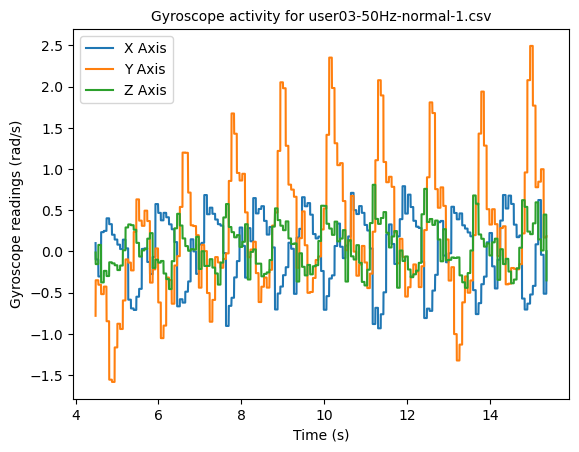

user04-50Hz-normal-test.csv
(5308, 8)


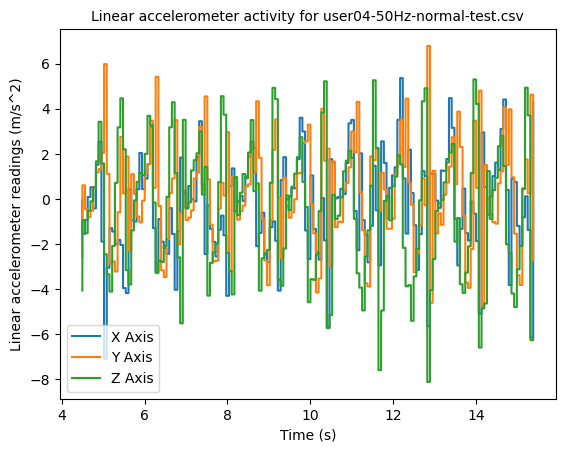

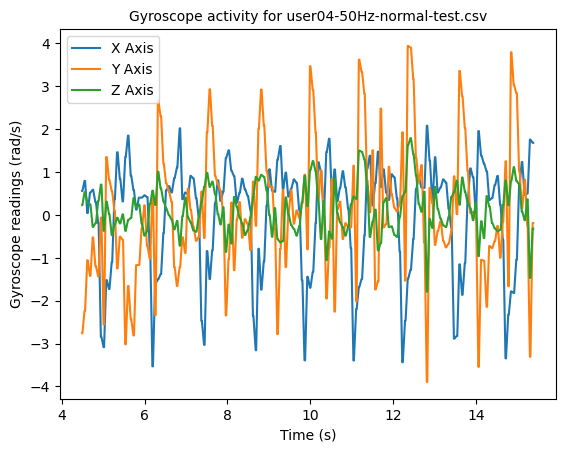

user02-50Hz-abnormal-leftshoe.csv
(8043, 8)


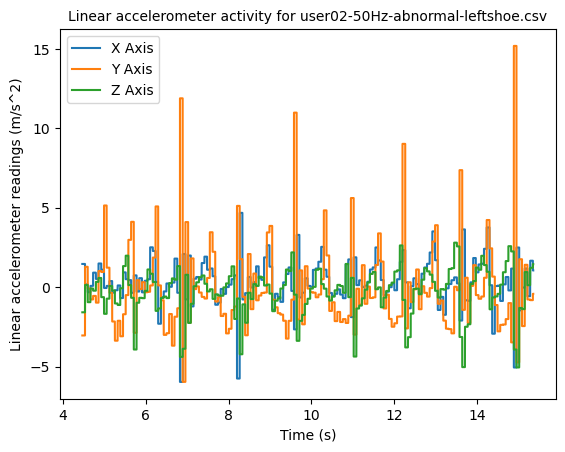

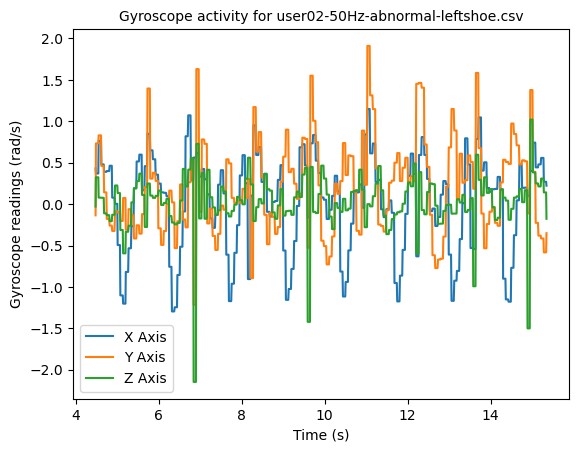

user02-50Hz-normal-fast.csv
(8190, 8)


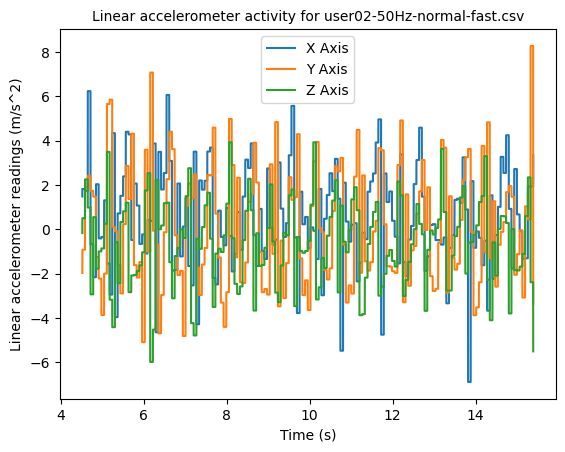

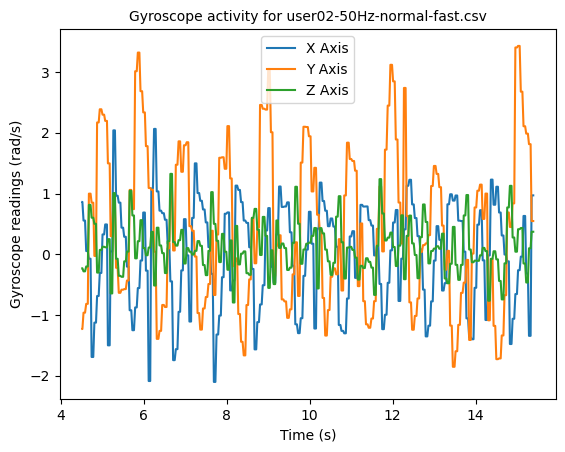

user04-abnormal-peggedleg-citycenter-2.csv
(6568, 8)


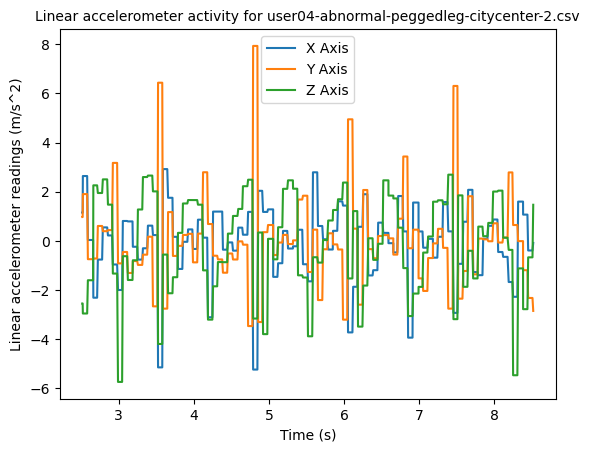

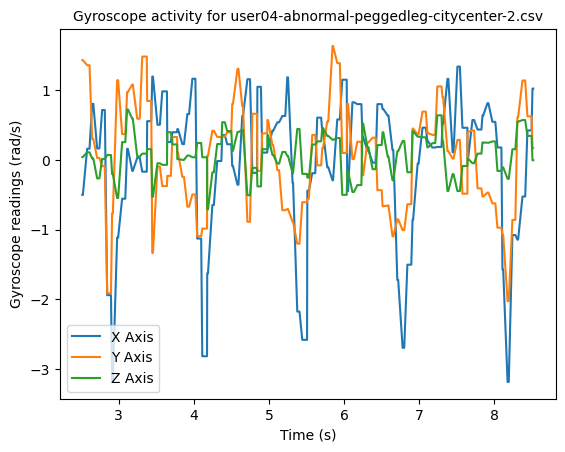

user02-50Hz-normal.csv
(8114, 8)


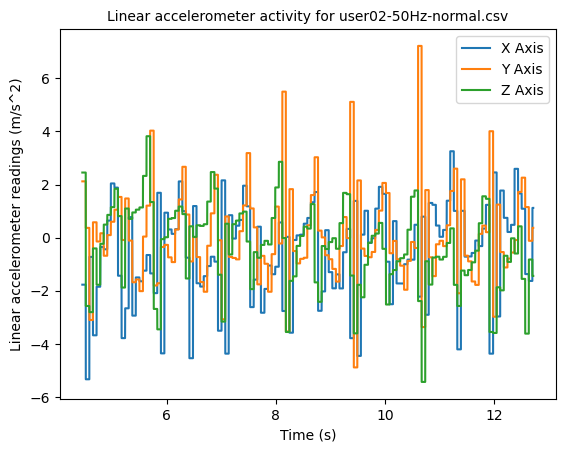

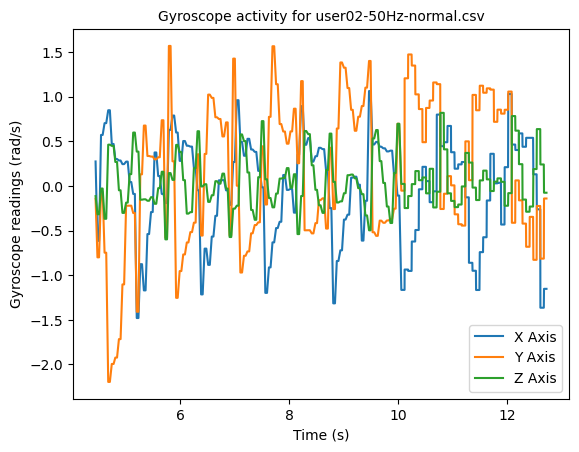

user04-50Hz-abnormal-rightshoe-test.csv
(5467, 8)


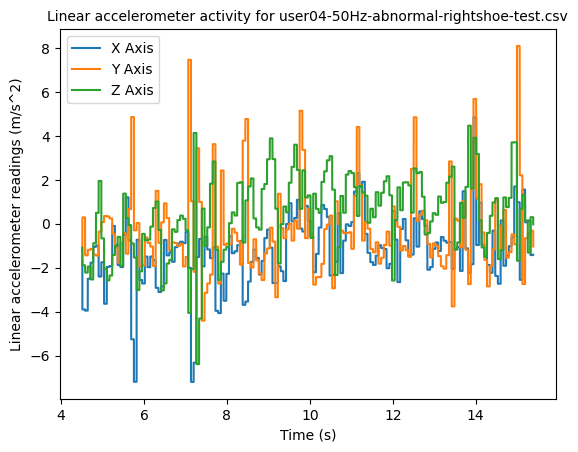

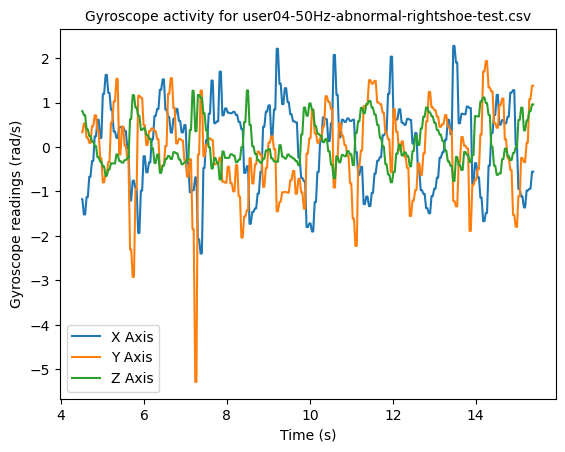

user01-50Hz-abnormal-leftpegged.csv
(8138, 8)


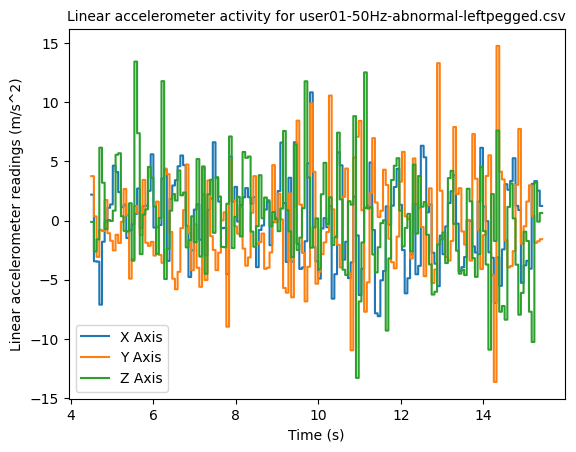

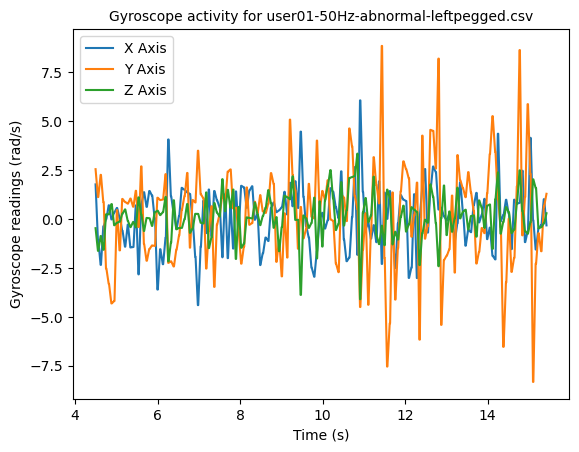

user03-50Hz-abnormal-leftpegged.csv
(8035, 8)


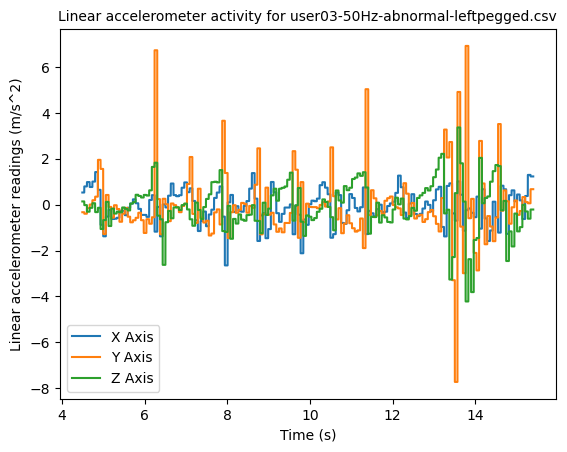

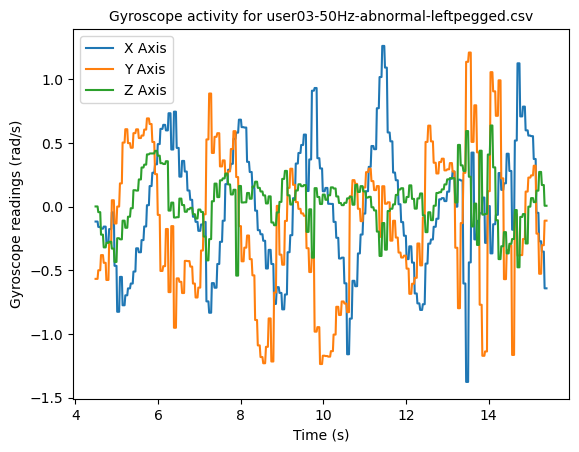

user01-50Hz-normal-1.csv
(8002, 8)


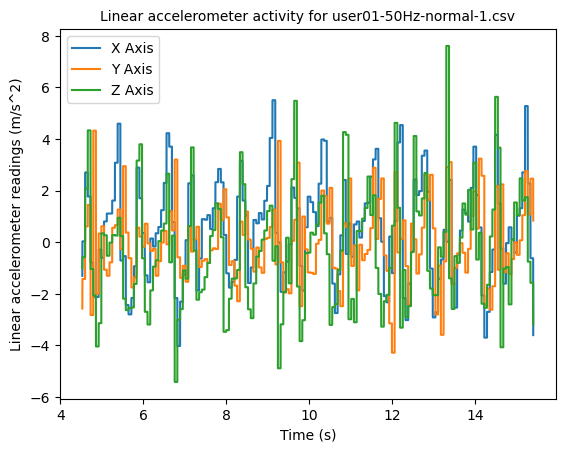

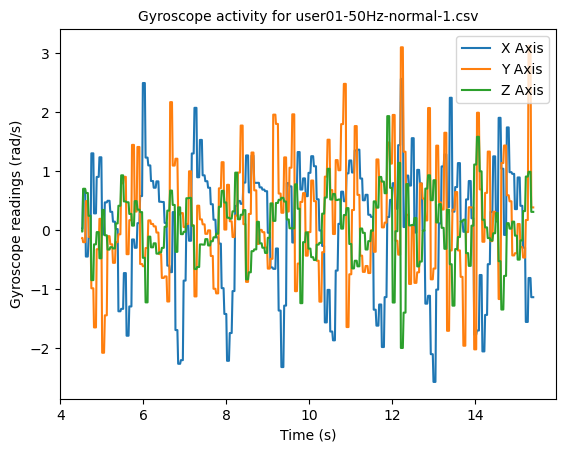

user01-50Hz-normal.csv
(8029, 8)


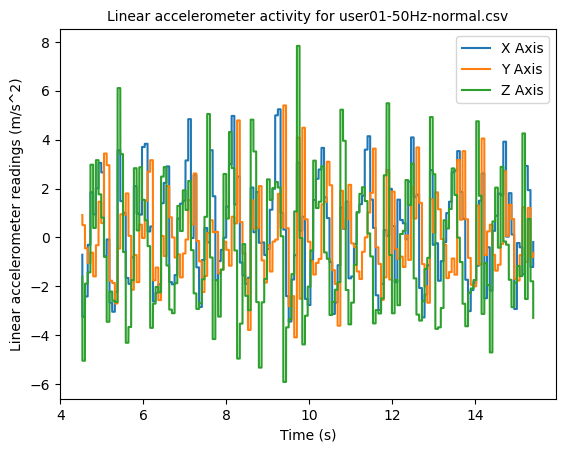

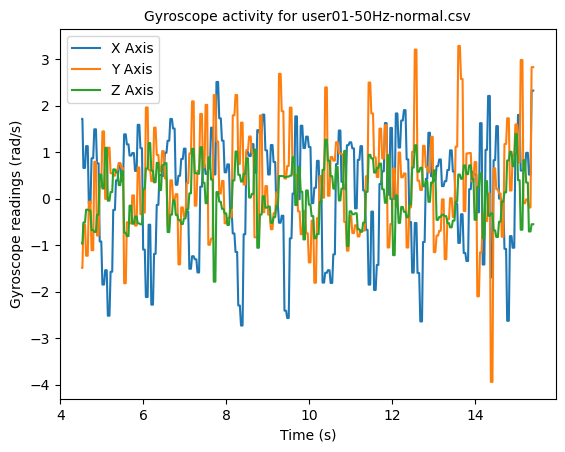

user02-50Hz-abnormal-leftshoe-test.csv
(2529, 8)


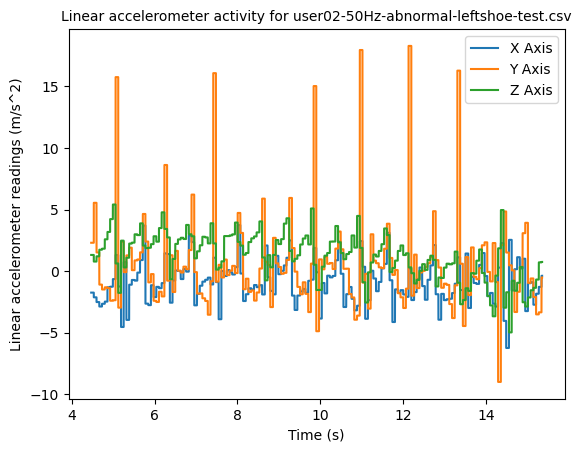

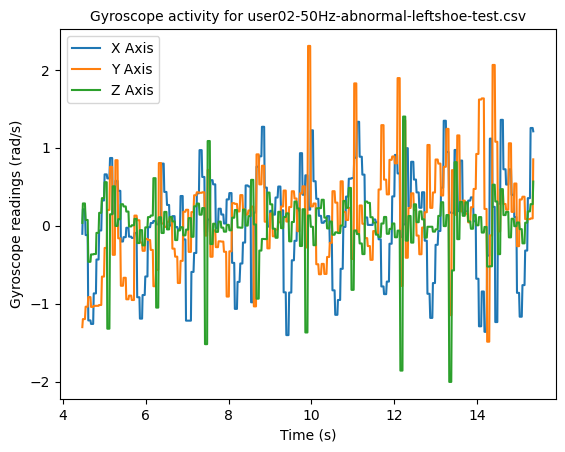

user01-50Hz-abnormal-leftpegged-test.csv
(2603, 8)


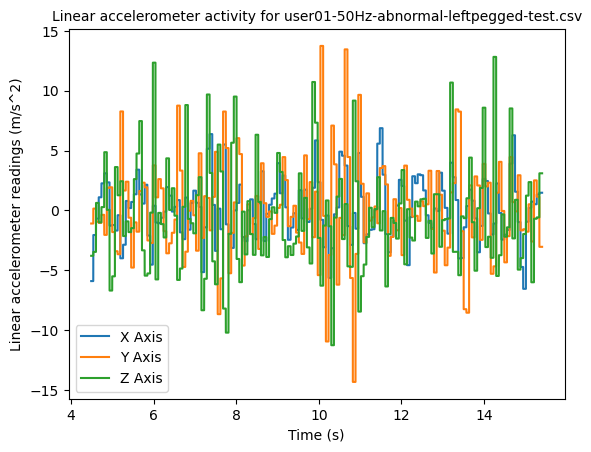

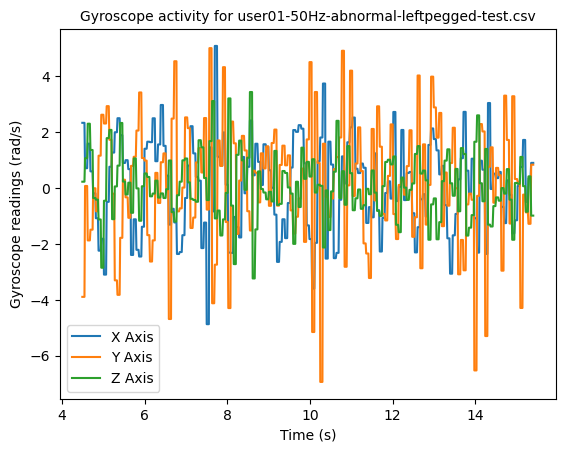

user03-50Hz-normal.csv
(7981, 8)


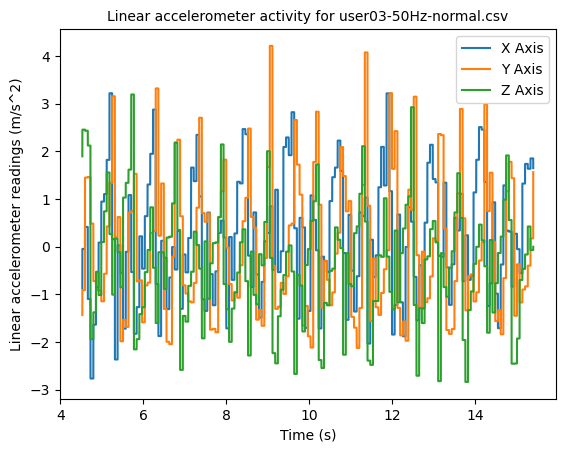

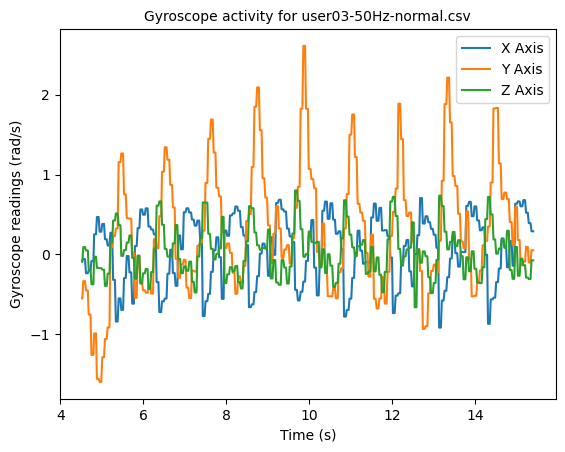

user02-50Hz-abnormal-leftpegged.csv
(8339, 8)


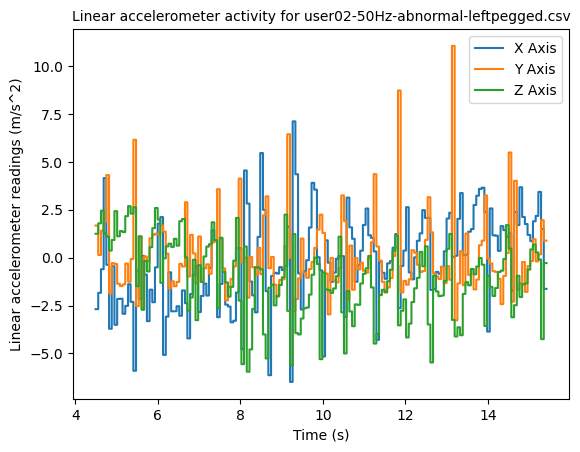

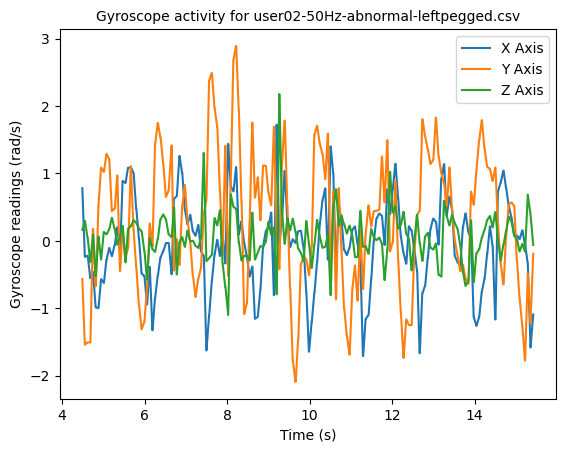

user02-50Hz-abnormal-rightshoe-test.csv
(2533, 8)


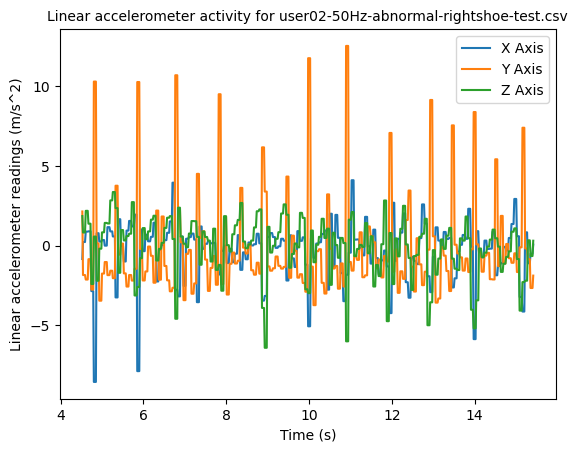

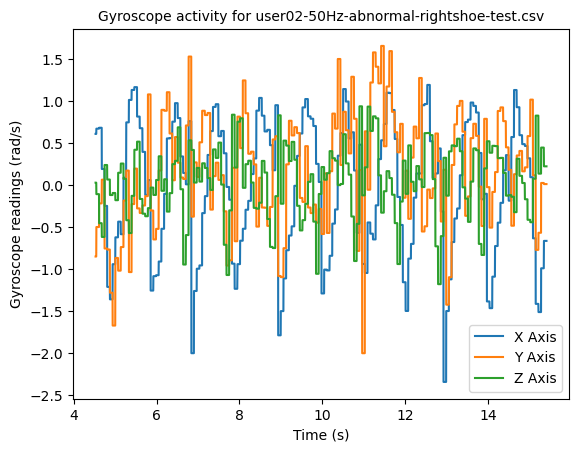

user01-50Hz-normal-fast.csv
(8081, 8)


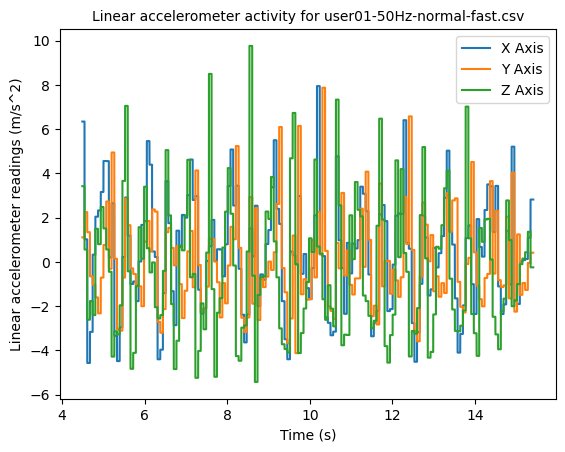

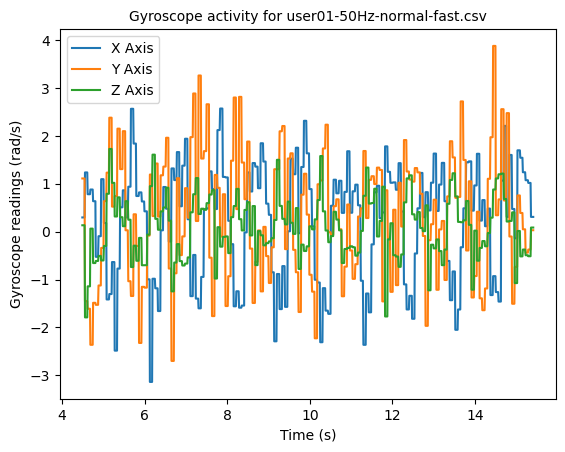

user02-50Hz-normal-test.csv
(2505, 8)


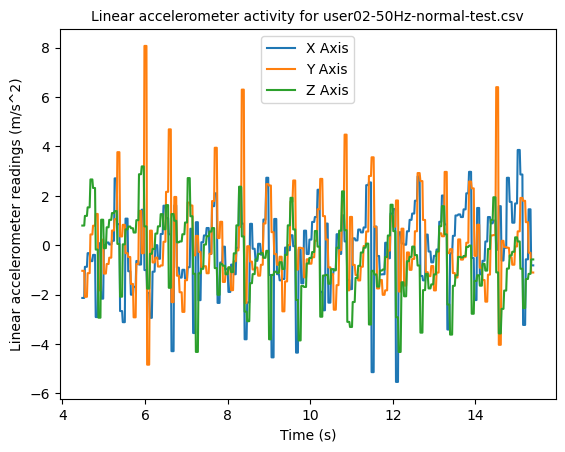

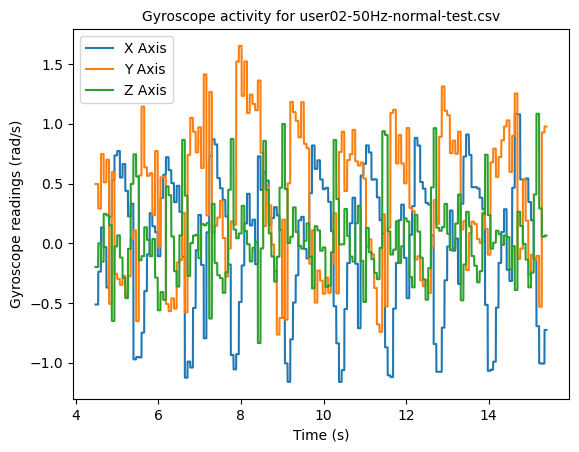

user03-50Hz-abnormal-leftshoe-test.csv
(5155, 8)


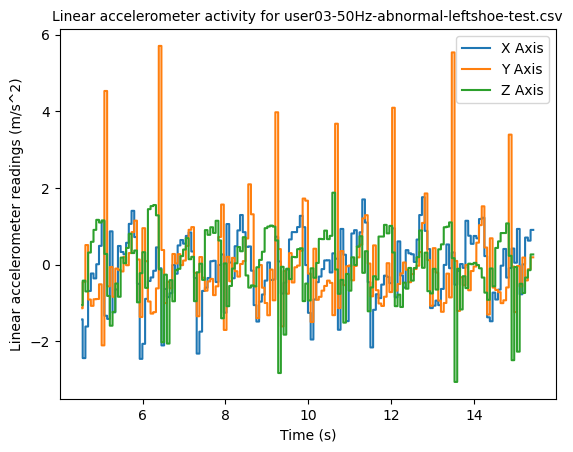

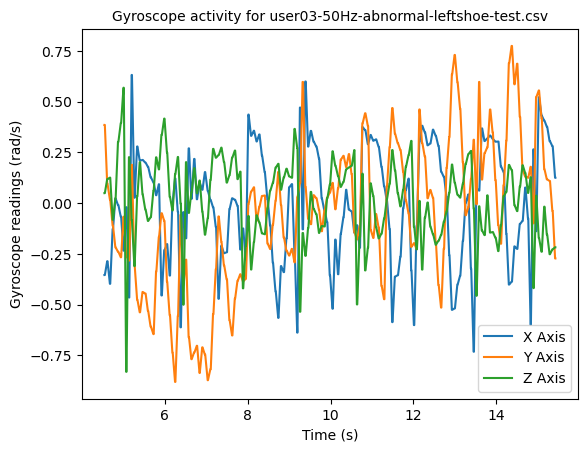

user03-50Hz-abnormal-rightshoe-test.csv
(5194, 8)


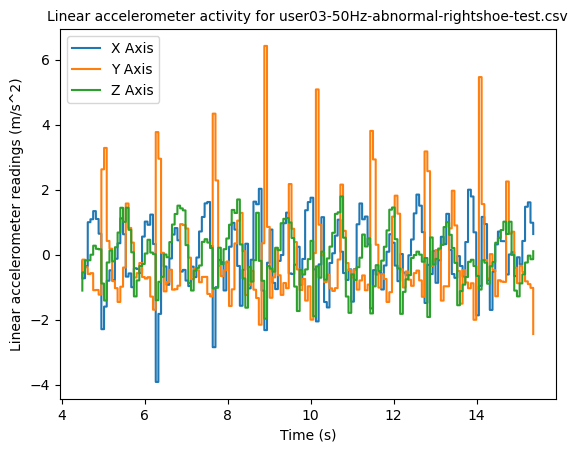

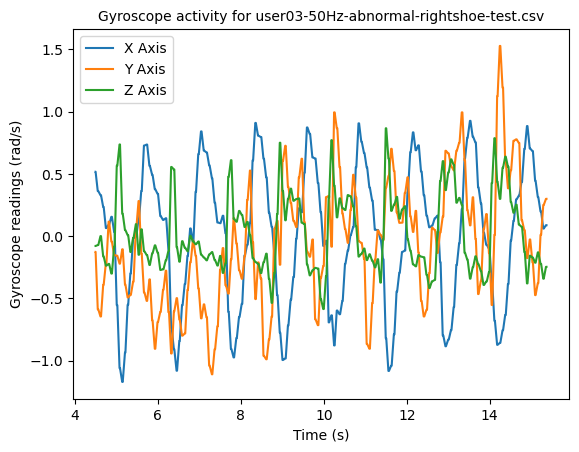

user03-50Hz-normal1.csv
(1540, 8)


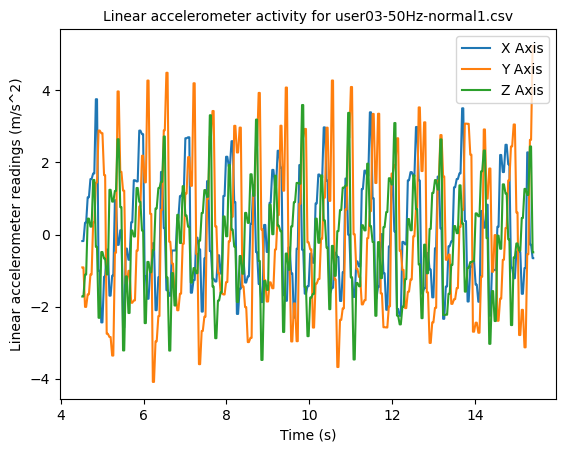

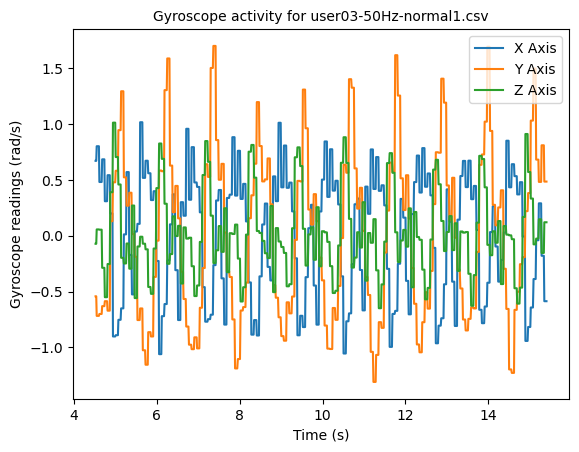

user01-50Hz-normal-test.csv
(2120, 8)


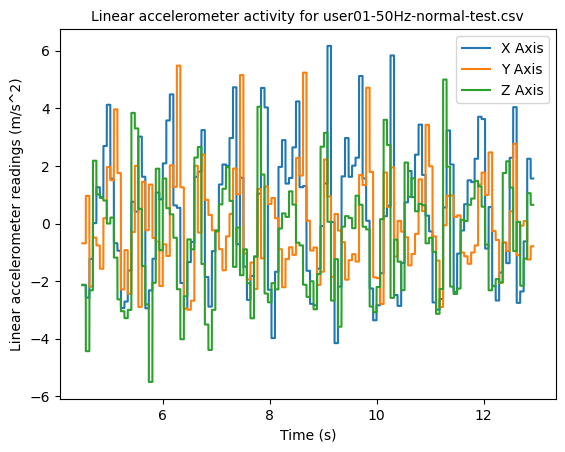

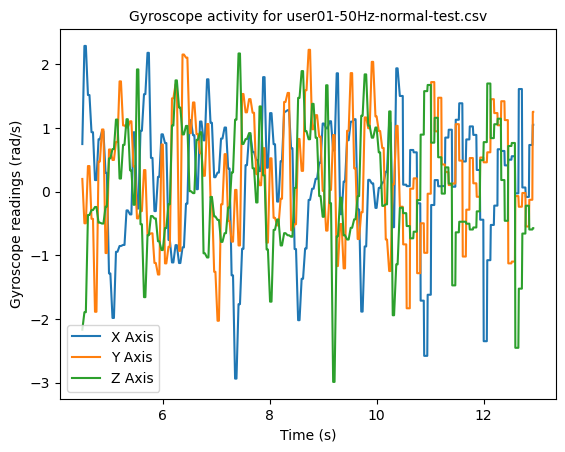

user04-50Hz-abnormal-leftpegged-test.csv
(5389, 8)


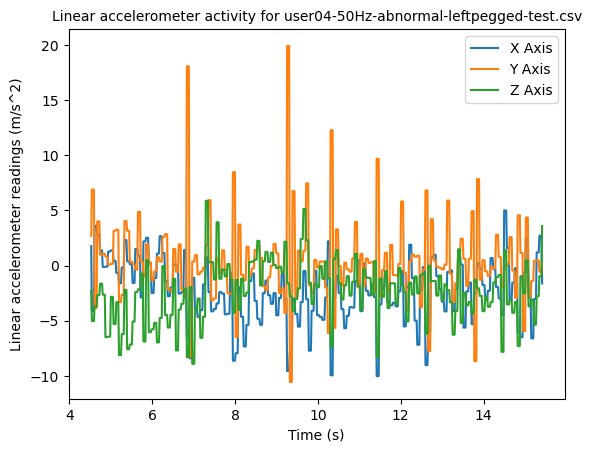

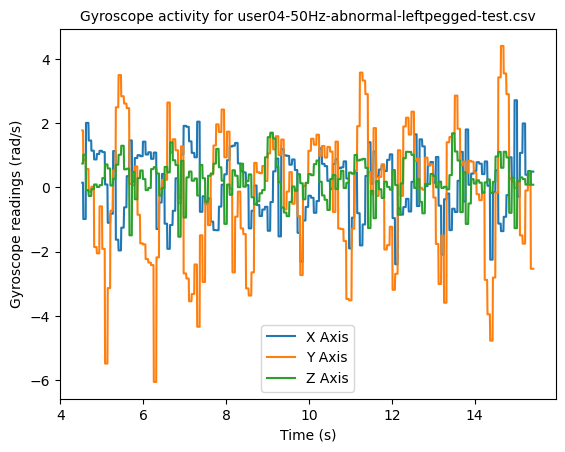

user03-50Hz-normal-test.csv
(5176, 8)


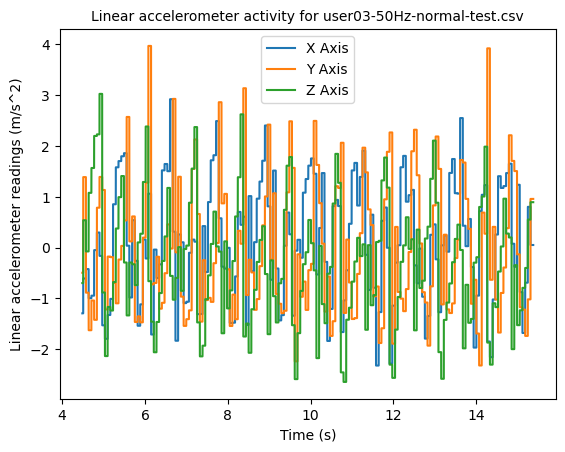

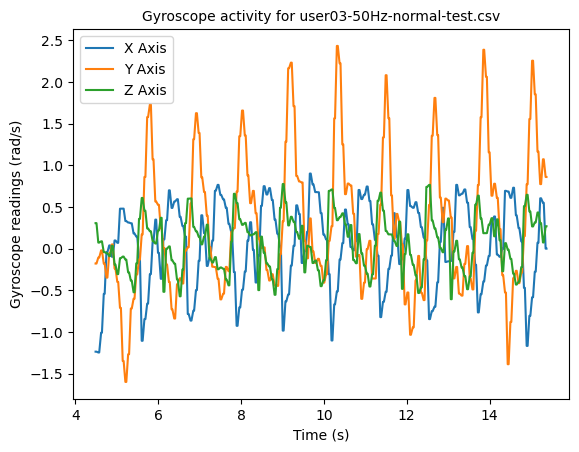

user01-50Hz-abnormal-rightshoe-test.csv
(2492, 8)


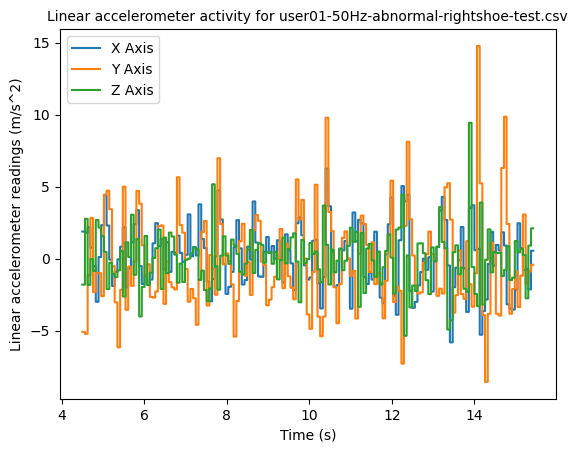

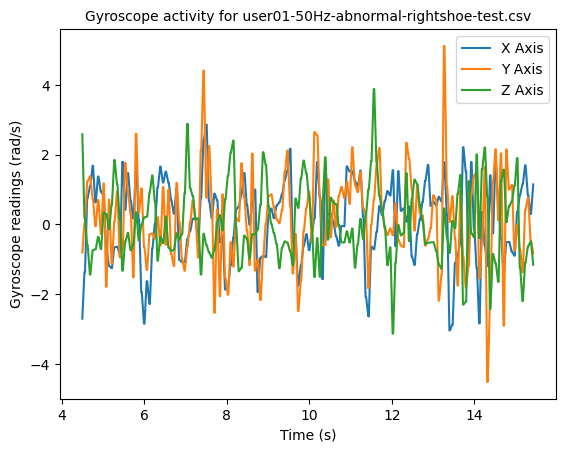

user01-50Hz-abnormal-leftshoe.csv
(7982, 8)


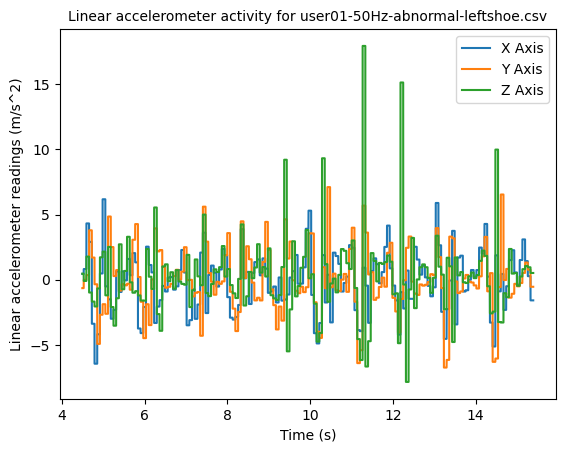

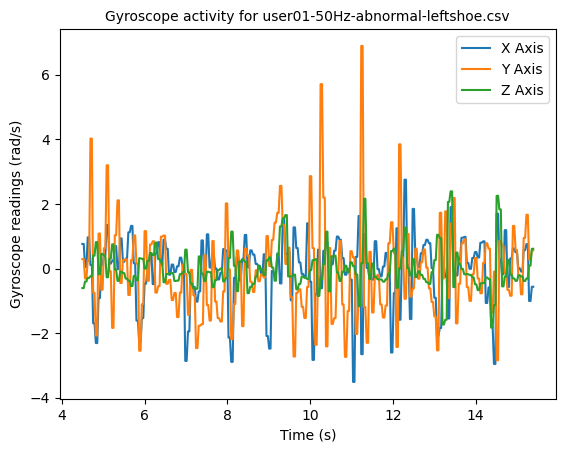

user01-50Hz-abnormal-rightshoe.csv
(7916, 8)


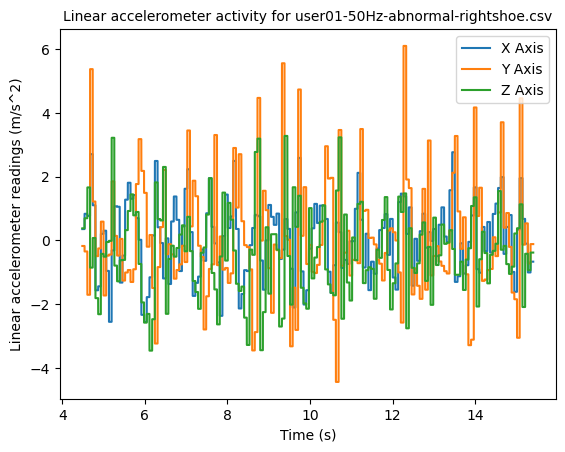

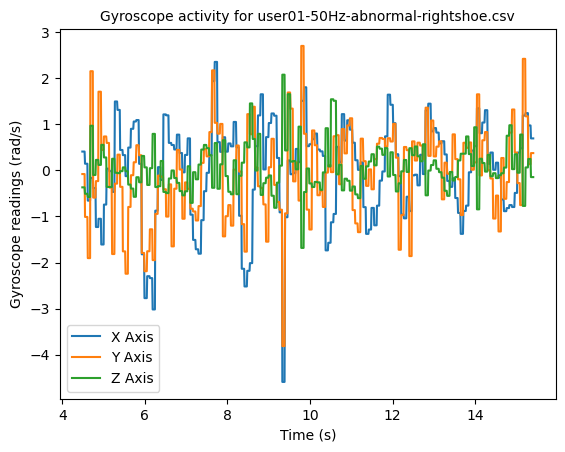

user03-50Hz-abnormal-rightshoe.csv
(8054, 8)


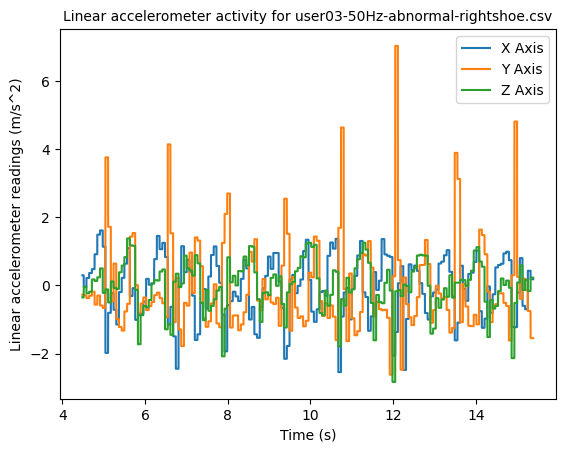

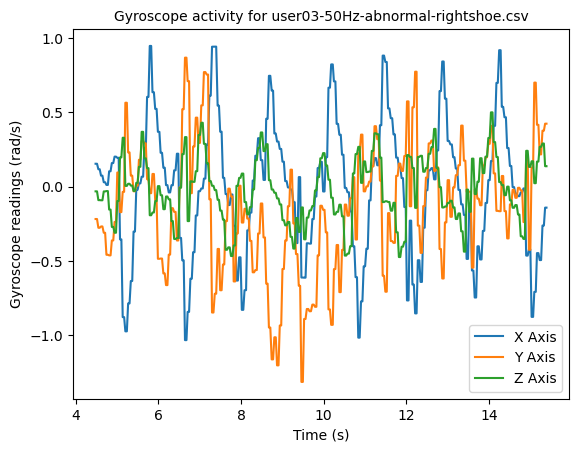

user03-50Hz-normal-fast.csv
(8071, 8)


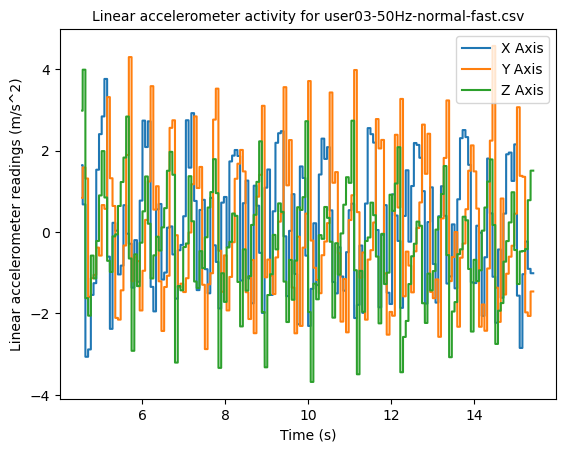

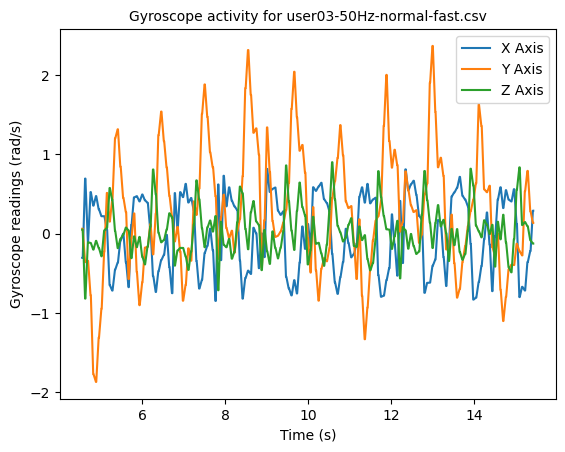

user01-50Hz-abnormal-leftshoe-test.csv
(2656, 8)


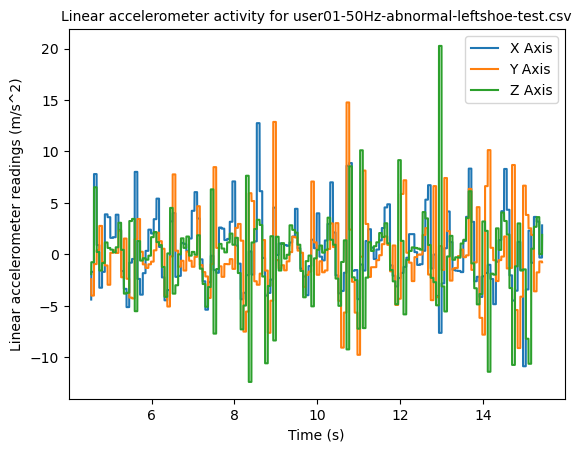

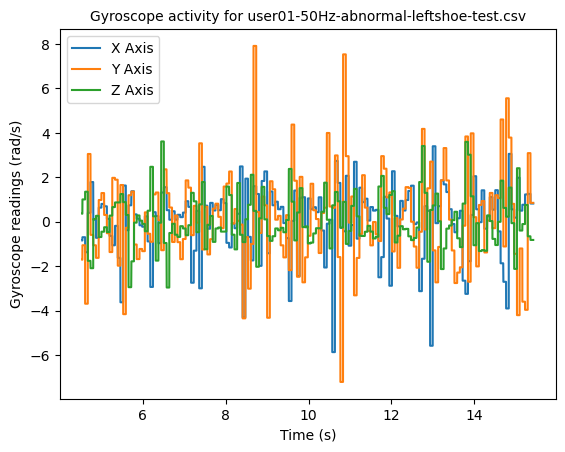

user04-50Hz-abnormal-leftshoe-test.csv
(5373, 8)


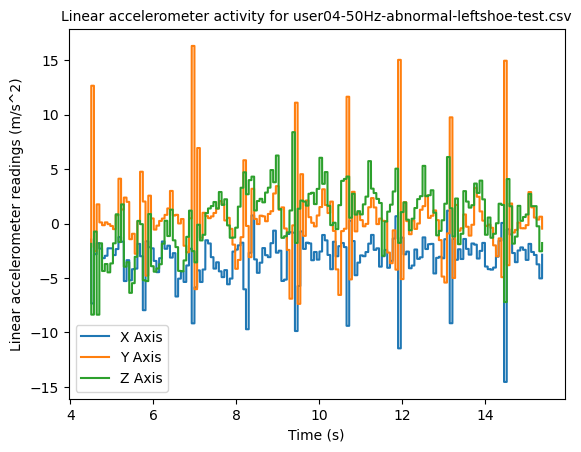

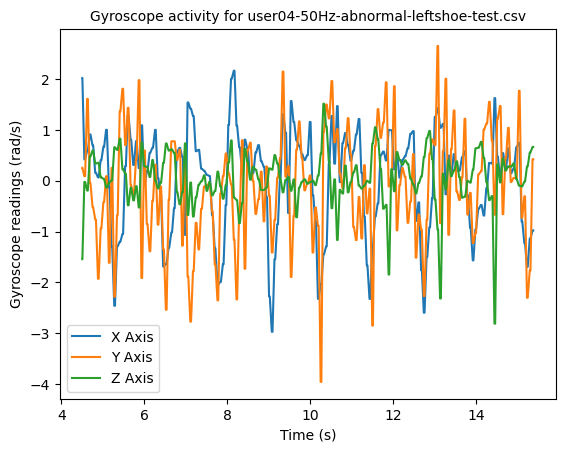

user03-50Hz-abnormal-leftpegged-test.csv
(5170, 8)


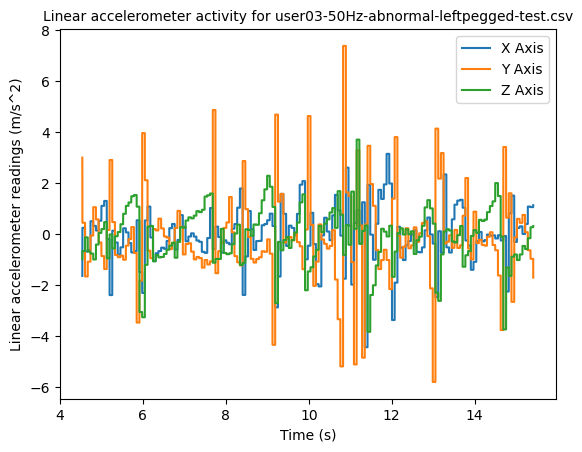

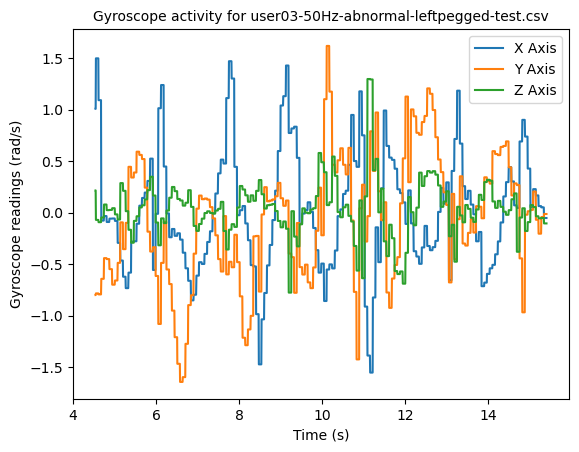

user02-50Hz-abnormal-leftpegged-test.csv
(2524, 8)


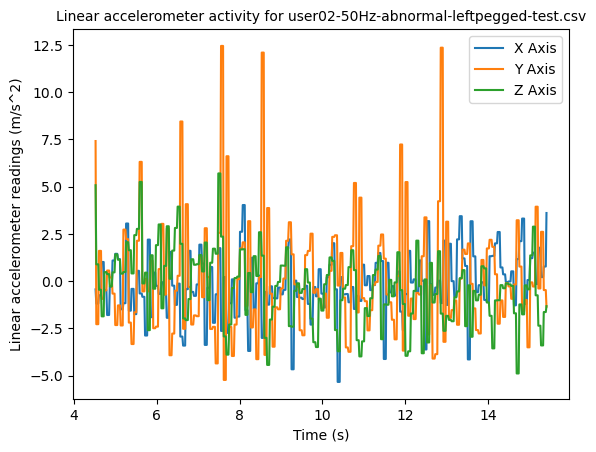

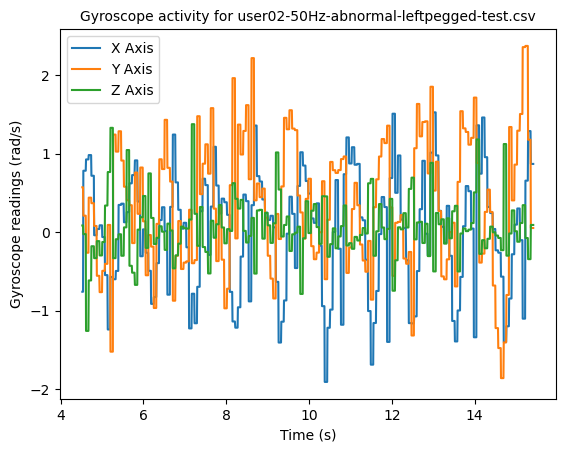

user02-50Hz-normal-1.csv
(8564, 8)


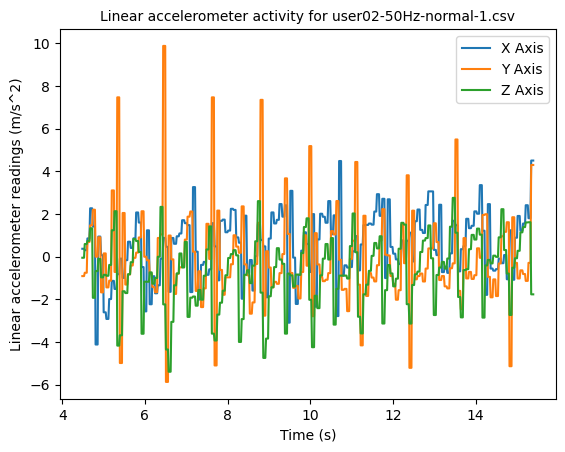

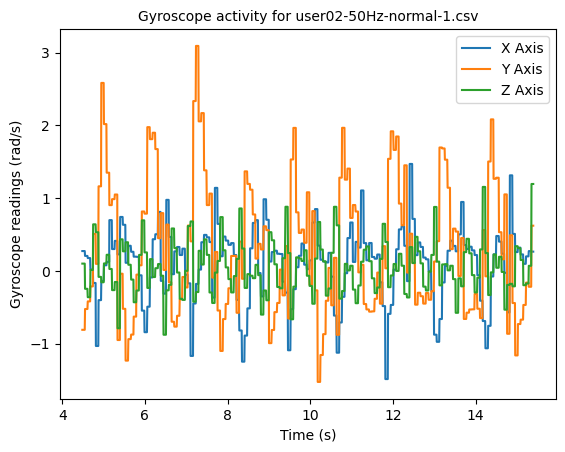

user03-50Hz-abnormal-leftshoe.csv
(8100, 8)


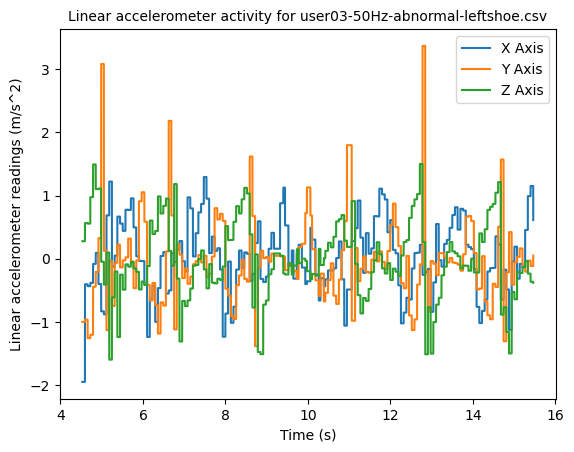

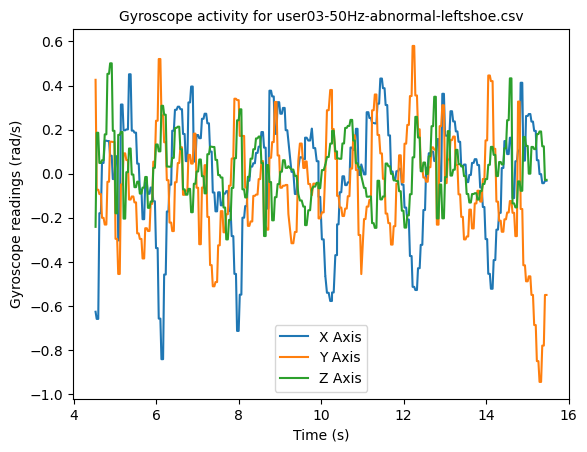

user02-50Hz-abnormal-rightshoe.csv
(8302, 8)


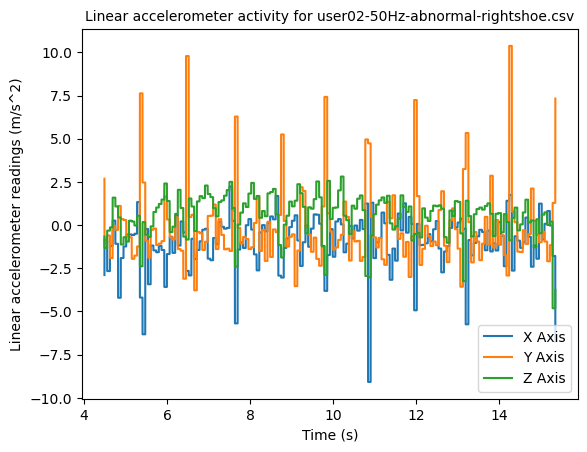

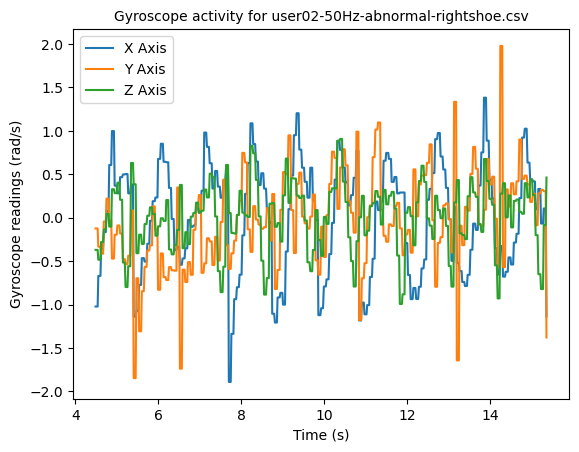

(216340, 8)


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from os import listdir
warnings.filterwarnings('ignore')

foldername = '2023-02-20-50Hz/train'

all_files = listdir('Dataset/' + foldername)
csv_files = list(filter(lambda f: f.endswith('.csv'), all_files))

df_har = pd.DataFrame()
columns = ['time', 'Ax-axis','Ay-axis', 'Az-axis', 'Gx-axis', 'Gy-axis', 'Gz-axis', 'Gait']

for name in csv_files:
    print(name)

    # reading raw data file
    df_har_tmp = pd.read_csv('Dataset/' + foldername + '/' + name, names = columns, error_bad_lines=False)  # type: ignore

    n = 200
    df_har_tmp = df_har_tmp.head(-n)
    df_har_tmp = df_har_tmp.tail(-n)

    if 'abnormal' in name.lower():
        df_har_tmp['Gait'] = 'abnormal'
    else:
        df_har_tmp['Gait'] = 'normal'

    # removing null values
    df_har_tmp = df_har_tmp.dropna()

    # transforming the x,y,z-axis to float
    df_har_tmp = df_har_tmp.astype({'time' : 'float', 'Ax-axis':'float','Ay-axis':'float', 'Az-axis':'float', 'Gx-axis':'float','Gy-axis':'float', 'Gz-axis':'float' })

    print(df_har_tmp.shape)

    #Print the graphs for the training data
    #sns.set_style("white")


    #sns.lineplot(y = 'Ax-axis', x = 'time', data = df_har_tmp[0:500])
    #sns.lineplot(y = 'Ay-axis', x = 'time', data = df_har_tmp[0:500])
    #sns.lineplot(y = 'Az-axis', x = 'time', data = df_har_tmp[0:500])
    df_har_tmp[0:500].plot(y = ['Ax-axis', 'Ay-axis', 'Az-axis'], x = 'time')
    plt.title("Linear accelerometer activity for " + name, fontsize = 10)
    plt.xlabel("Time (s)")
    plt.ylabel("Linear accelerometer readings (m/s^2)")
    plt.legend(["X Axis", "Y Axis", "Z Axis"])
    plt.savefig ('Dataset/' + foldername + '/plots/' + name + 'acc.pdf')
    plt.show()


    #sns.lineplot(y = 'Gx-axis', x = 'time', data = df_har_tmp[0:500])
    #sns.lineplot(y = 'Gy-axis', x = 'time', data = df_har_tmp[0:500])
    #sns.lineplot(y = 'Gz-axis', x = 'time', data = df_har_tmp[0:500])
    df_har_tmp[0:500].plot(y = ['Gx-axis', 'Gy-axis', 'Gz-axis'], x = 'time')
    plt.title("Gyroscope activity for " + name, fontsize = 10)
    plt.xlabel("Time (s)")
    plt.ylabel("Gyroscope readings (rad/s)")
    plt.legend(["X Axis", "Y Axis", "Z Axis"])
    plt.savefig ('Dataset/' + foldername + '/plots/' + name + 'gyr.pdf')
    plt.show()

    df_har = df_har.append(df_har_tmp) #iloc[::5, :])

print(df_har.shape)




## Segments the data


In [2]:
random_seed = 84   
n_time_steps = 500
n_features = 6
step = 50
n_classes = 2
n_epochs = 200      
batch_size = 1024  
learning_rate = 0.0025
l2_loss = 0.0015

def sgdata(data):
    print(data.shape)

    segments = []
    labels = []

    for i in range(0,  data.shape[0]- n_time_steps, step):

        Axs = data['Ax-axis'].values[i: i + n_time_steps]
        Ays = data['Ay-axis'].values[i: i + n_time_steps]
        Azs = data['Az-axis'].values[i: i + n_time_steps]

        Gxs = data['Gx-axis'].values[i: i + n_time_steps]
        Gys = data['Gy-axis'].values[i: i + n_time_steps]
        Gzs = data['Gz-axis'].values[i: i + n_time_steps]

        label = stats.mode(data['Gait'][i: i + n_time_steps])[0][0]

        segments.append([Axs, Ays, Azs, Gxs, Gys, Gzs])

        labels.append(label)

    #reshape the segments which is (list of arrays) to a list
    print(len(segments))
    reshaped_segments = np.asarray(segments).reshape(-1, n_time_steps, n_features)
    print(reshaped_segments.shape)
    labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)
    return reshaped_segments, labels

reshaped_segments, labels = sgdata(df_har)


(216340, 8)
4317
(4317, 500, 6)


## Split the data into training and testing

In [3]:
print(reshaped_segments.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, labels, test_size = 0.2, random_state = random_seed)

(4317, 500, 6)


## Create the model

2023-03-25 19:41:35.664227: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-25 19:41:36.262909: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-25 19:41:36.262951: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-25 19:41:38.391734: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               69120     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 77,506
Trainable params: 77,506
Non-trainable params: 0
_________________________________________________________________
None


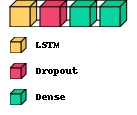

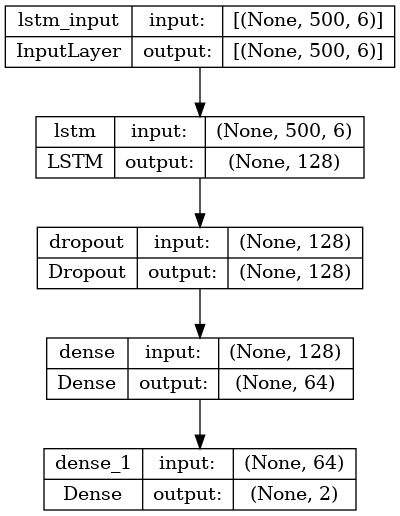

In [4]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout
from keras.utils.vis_utils import plot_model
import visualkeras
from keras_visualizer import visualizer
from ann_visualizer.visualize import ann_viz

model = Sequential()
# RNN layer
model.add(LSTM(units = 128, input_shape = (X_train.shape[1], X_train.shape[2])))
# Dropout layer
model.add(Dropout(0.5)) 
# Dense layer with ReLu
model.add(Dense(units = 64, activation='relu'))
# Softmax layer
model.add(Dense(y_train.shape[1], activation = 'softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
visualkeras.layered_view(model, legend = True).show()
#visualkeras.layered_view(model, legend = True, to_file='output.png').show() # write and show

#visualkeras.layered_view(model)
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
#visualizer(model, format='png', view=True)
#ann_viz(model, view=True)

## Train the model

Epoch 1/200
3/3 [==============================] - 18s 5s/step - loss: 0.6948 - accuracy: 0.4978 - val_loss: 0.6876 - val_accuracy: 0.5861
Epoch 2/200
3/3 [==============================] - 14s 5s/step - loss: 0.6866 - accuracy: 0.5811 - val_loss: 0.6801 - val_accuracy: 0.5847
Epoch 3/200
3/3 [==============================] - 14s 5s/step - loss: 0.6780 - accuracy: 0.5854 - val_loss: 0.6699 - val_accuracy: 0.5818
Epoch 4/200
3/3 [==============================] - 14s 5s/step - loss: 0.6688 - accuracy: 0.5836 - val_loss: 0.6554 - val_accuracy: 0.5832
Epoch 5/200
3/3 [==============================] - 15s 5s/step - loss: 0.6492 - accuracy: 0.5822 - val_loss: 0.5653 - val_accuracy: 0.6049
Epoch 6/200
3/3 [==============================] - 15s 5s/step - loss: 0.5316 - accuracy: 0.6915 - val_loss: 0.4856 - val_accuracy: 0.8104
Epoch 7/200
3/3 [==============================] - 14s 5s/step - loss: 0.5838 - accuracy: 0.8070 - val_loss: 0.4306 - val_accuracy: 0.8119
Epoch 8/200
3/3 [==========

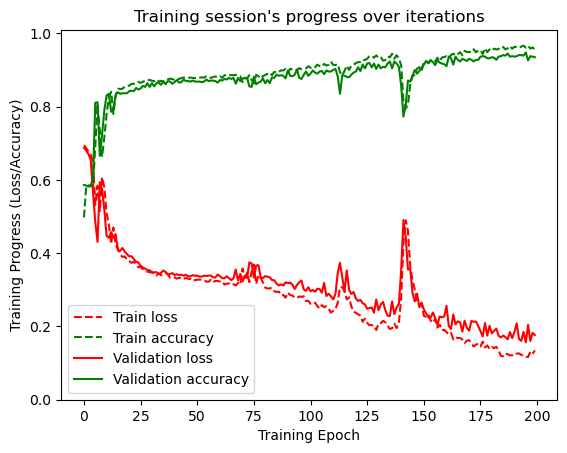

In [5]:
history = model.fit(X_train, y_train, epochs = n_epochs, validation_split = 0.20, batch_size = batch_size, verbose = 1)
plt.plot(np.array(history.history['loss']), "r--", label = "Train loss")
plt.plot(np.array(history.history['accuracy']), "g--", label = "Train accuracy")
plt.plot(np.array(history.history['val_loss']), "r-", label = "Validation loss")
plt.plot(np.array(history.history['val_accuracy']), "g-", label = "Validation accuracy")
plt.title("Training session's progress over iterations")
plt.legend(loc='lower left')
plt.ylabel('Training Progress (Loss/Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0) 
plt.show()

In [6]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size = batch_size, verbose = 1)
print("Test Accuracy :", accuracy)
print("Test Loss :", loss)

1/1 [==============================] - 2s 2s/step - loss: 0.1323 - accuracy: 0.9549
Test Accuracy : 0.9548611044883728
Test Loss : 0.13226640224456787


## Create the confusion matrix

In [7]:
from sklearn import metrics
#from keras.metrics import confusion_matrix
# predictions = model.predict(X_test)
class_labels = ['abnormal', 'normal']
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)
confusion_matrix = [ [468, 10], [18, 336] ]
sns.heatmap(confusion_matrix, xticklabels = class_labels, yticklabels = class_labels, annot = True, linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label', fontsize = 12)
plt.xlabel('Predicted label', fontsize = 12)
# plt.show()
plt.savefig('confusion_matrix.pdf')

NameError: name 'predictions' is not defined

## Use the code to predict

In [ ]:
foldername = '2023-02-23/test'

testfile = 'user03-50Hz-normal1-2-23.csv'

testdata = pd.read_csv('Dataset/' + foldername + '/' + testfile, names = columns, error_bad_lines=False)


# clean the data
n = 200
testdata = testdata.tail(-n)
testdata = testdata.head(-n)
if 'abnormal' in testfile.lower():
    testdata['Gait'] = 'abnormal'
else:
    testdata['Gait'] = 'normal'
testdata = testdata.astype({'Ax-axis':'float','Ay-axis':'float', 'Az-axis':'float', 'Gx-axis':'float','Gy-axis':'float', 'Gz-axis':'float' })

  
print (testdata.shape)  


rstest, labeltest = sgdata(testdata)

prediction = model.predict(rstest)

#print(prediction)

# Finds the average percent of abnormal and normal and output them

sum1 = 0
sum2 = 0

for i in prediction:
    print("0: " + str(i[0]) + "; 1: " + str(i[1]))
    #if (i[0] > i[1]):
    #    print("abnormal")
    #else:
    #    print("normal")
    sum1 += i[0]
    sum2 += i[1]

print("Abnormal: " + str(sum1 / len(prediction)))
print("Normal: " + str(sum2 / len(prediction)))


(5166, 8)
(5166, 8)
94
(94, 500, 6)
3/3 [==============================] - 1s 199ms/step
0: 0.9561438; 1: 0.043856192
0: 0.9762832; 1: 0.023716765
0: 0.9664496; 1: 0.033550367
0: 0.96712136; 1: 0.032878626
0: 0.9760906; 1: 0.023909489
0: 0.9799835; 1: 0.020016482
0: 0.97728676; 1: 0.022713302
0: 0.97673726; 1: 0.023262806
0: 0.9812571; 1: 0.018742926
0: 0.9771148; 1: 0.02288513
0: 0.9752006; 1: 0.024799276
0: 0.97257113; 1: 0.027428875
0: 0.9650586; 1: 0.03494134
0: 0.97059786; 1: 0.029402085
0: 0.9734132; 1: 0.026586726
0: 0.97155035; 1: 0.028449578
0: 0.96497375; 1: 0.03502634
0: 0.92662215; 1: 0.07337787
0: 0.91415566; 1: 0.08584431
0: 0.9293541; 1: 0.07064599
0: 0.97896606; 1: 0.021034015
0: 0.96325856; 1: 0.036741458
0: 0.9547954; 1: 0.045204517
0: 0.97617596; 1: 0.023823962
0: 0.9799109; 1: 0.020089004
0: 0.9726001; 1: 0.02739992
0: 0.9767413; 1: 0.02325871
0: 0.9757868; 1: 0.024213238
0: 0.9754343; 1: 0.024565736
0: 0.9762363; 1: 0.02376369
0: 0.97782516; 1: 0.022174837
0: 0.969

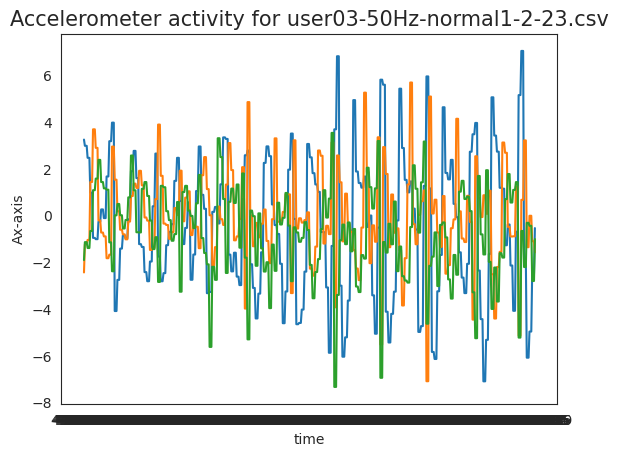

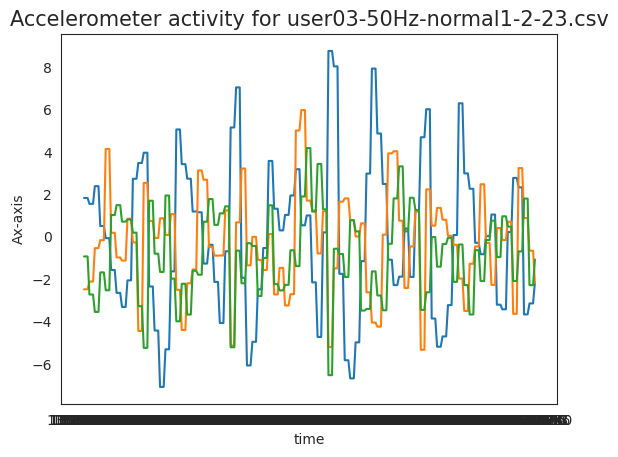

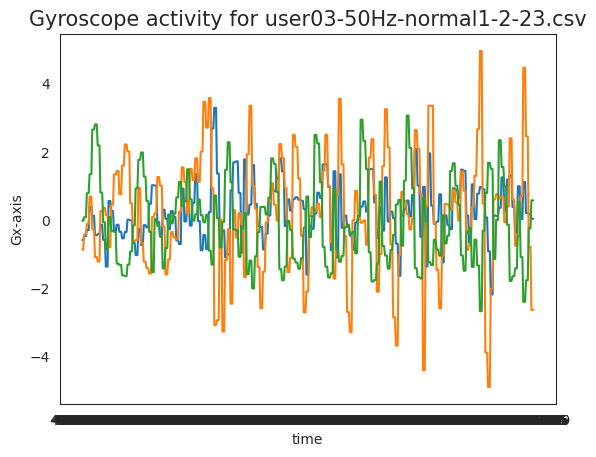

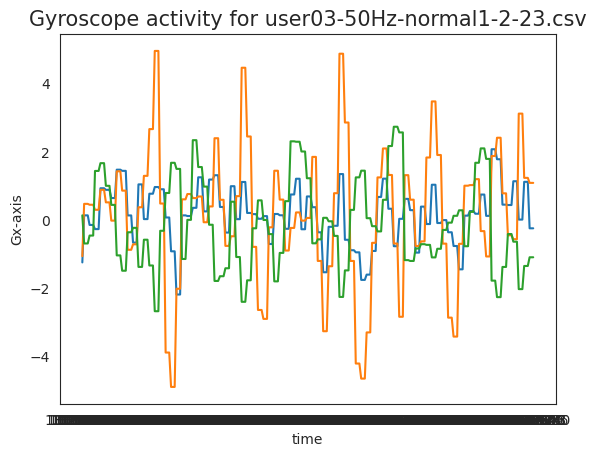

In [ ]:
foldername = '2023-02-23/test'
testfile = 'user03-50Hz-normal1-2-23.csv'
testdata = pd.read_csv('Dataset/' + foldername + '/' + testfile, names = columns, error_bad_lines=False)

# clean the data
n = 200
testdata = testdata.tail(-n)
testdata = testdata.head(-n)
if 'abnormal' in testfile.lower():
    testdata['Gait'] = 'abnormal'
else:
    testdata['Gait'] = 'normal'
testdata = testdata.astype({'Ax-axis':'float','Ay-axis':'float', 'Az-axis':'float', 'Gx-axis':'float','Gy-axis':'float', 'Gz-axis':'float' })

sns.set_style("white")

datapoint = 0
sns.lineplot(y = 'Ax-axis', x = 'time', data = testdata[datapoint*step:datapoint*step+n_time_steps])
sns.lineplot(y = 'Ay-axis', x = 'time', data = testdata[datapoint*step:datapoint*step+n_time_steps])
sns.lineplot(y = 'Az-axis', x = 'time', data = testdata[datapoint*step:datapoint*step+n_time_steps])
plt.title("Accelerometer activity for " + testfile, fontsize = 15)
plt.show()

datapoint = 8
sns.lineplot(y = 'Ax-axis', x = 'time', data = testdata[datapoint*50:datapoint*50+250])
sns.lineplot(y = 'Ay-axis', x = 'time', data = testdata[datapoint*50:datapoint*50+250])
sns.lineplot(y = 'Az-axis', x = 'time', data = testdata[datapoint*50:datapoint*50+250])
plt.title("Accelerometer activity for " + testfile, fontsize = 15)
plt.show()

datapoint = 0
sns.lineplot(y = 'Gx-axis', x = 'time', data = testdata[datapoint*step:datapoint*step+n_time_steps])
sns.lineplot(y = 'Gy-axis', x = 'time', data = testdata[datapoint*step:datapoint*step+n_time_steps])
sns.lineplot(y = 'Gz-axis', x = 'time', data = testdata[datapoint*step:datapoint*step+n_time_steps])
plt.title("Gyroscope activity for " + testfile, fontsize = 15)
plt.show()

datapoint = 8
sns.lineplot(y = 'Gx-axis', x = 'time', data = testdata[datapoint*50:datapoint*50+250])
sns.lineplot(y = 'Gy-axis', x = 'time', data = testdata[datapoint*50:datapoint*50+250])
sns.lineplot(y = 'Gz-axis', x = 'time', data = testdata[datapoint*50:datapoint*50+250])
plt.title("Gyroscope activity for " + testfile, fontsize = 15)
plt.show()

In [8]:
model.save('model.h5')